<a href="https://colab.research.google.com/github/adigup390/deepintocnn/blob/main/W3Exercise2Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! git clone https://github.com/mabhay3420/Deep-Into-CNN/

fatal: destination path 'Deep-Into-CNN' already exists and is not an empty directory.


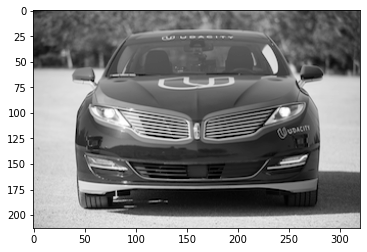

In [24]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/Deep-Into-CNN/W3/02-conv-visualization/data/udacity_sdc.png'

bgr_img = cv2.imread(img_path)

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap='gray')
plt.show()

In [25]:
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [26]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print("filter 2: \n", filter_2)

filter 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]


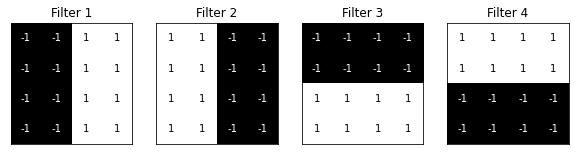

In [27]:
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()
    k_height, k_width = weight.shape[2:]
    self.conv = nn.Conv2d(1,4, kernel_size = (k_height, k_width), bias = False)
    self.conv.weight = torch.nn.Parameter(weight)
    self.pool = nn.MaxPool2d(2,2)
  def forward(self,x):
    conv_x = self.conv(x)
    activated_x  = F.relu(conv_x)
    pooled_x = self.pool(activated_x)
    return conv_x, activated_x, pooled_x

In [29]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [30]:
filters.shape

(4, 4, 4)

In [31]:
def viz_layer(layer, n_filters = 4):
  fig = plt.figure(figsize = (20,20))

  for i in range(n_filters):
    ax = fig.add_subplot(1,n_filters, i+1)

    ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap = 'gray')
    ax.set_title('Output %s' % str(i+1))

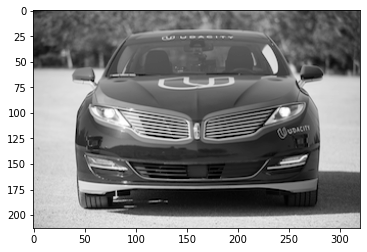

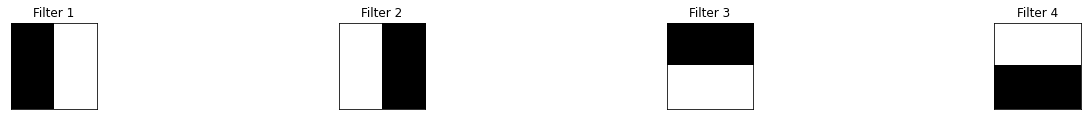

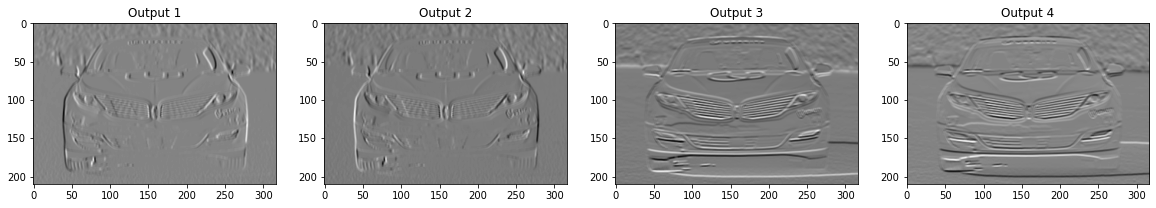

In [34]:

plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

viz_layer(conv_layer)

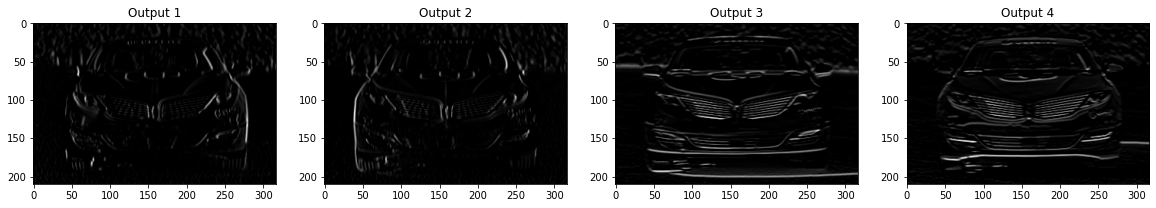

In [35]:
viz_layer(activated_layer)